### Load Libraries and Dataset

In [319]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime 
from matplotlib.ticker import FuncFormatter
import pyodbc


# Define the connection string
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=localhost\\SQLEXPRESS;'
    'DATABASE=AdventureWorks2022;'
    'Trusted_Connection=yes;'
)


# Write the SQL query to select data from the view
sql_query = "SELECT * FROM HumanResources.vEmployeeHRProject ORDER BY BusinessEntityID"

# Load the data from SQL Server into a pandas DataFrame
df = pd.read_sql(sql_query, conn)

# Close the connection
conn.close()

C:\Users\rbrod\AppData\Local\Temp\ipykernel_5928\3415392504.py:22: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



### Define Color for Charts

In [320]:

import matplotlib.colors

# Get the crest palette
palette = sns.color_palette("crest")

# Get the last color from the palette
last_color = palette[-1]

# Convert the color to a hex code
hex_code = matplotlib.colors.to_hex(last_color)

print(hex_code)

#254b7f


### Clean Data

In [321]:
# Step 1: Filter for rows where 'EndDate' is null
filtered_df = df[df['EndDate'].isnull()]

# Step 2: Sort by 'RateChangeDate' within each 'BusinessEntityID'
# and keep only the latest one
cleaned_df = (filtered_df
              .sort_values('RateChangeDate', ascending=False)
              .groupby('BusinessEntityID')
              .first()  # Keep the first entry after sorting (latest RateChangeDate)
              .reset_index())

In [322]:
cleaned_df

,BusinessEntityID,DepartmentID,ShiftID,StartDate,EndDate,JobTitle,BirthDate,MaritalStatus,Gender,HireDate,...,PayFrequency,ShiftName,ShiftStart,ShiftEnd,AddressID,City,PostalCode,PhoneNumber,PhoneNumberTypeID,PhoneType
0,1,16,1,2009-01-14,None,Chief Executive Officer,1969-01-29,S,M,2009-01-14,...,2,Day,07:00:00,15:00:00,249,Newport Hills,98006,697-555-0142,1,Cell
1,2,1,1,2008-01-31,None,Vice President of Engineering,1971-08-01,S,F,2008-01-31,...,2,Day,07:00:00,15:00:00,293,Renton,98055,819-555-0175,3,Work
2,3,1,1,2007-11-11,None,Engineering Manager,1974-11-12,M,M,2007-11-11,...,2,Day,07:00:00,15:00:00,224,Redmond,98052,212-555-0187,1,Cell
3,4,2,1,2010-05-31,None,Senior Tool Designer,1974-12-23,S,M,2007-12-05,...,2,Day,07:00:00,15:00:00,11387,Minneapolis,55402,612-555-0100,1,Cell
4,5,1,1,2008-01-06,None,Design Engineer,1952-09-27,M,F,2008-01-06,...,2,Day,07:00:00,15:00:00,190,Bellevue,98004,849-555-0139,1,Cell
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
285,286,3,1,2013-05-30,None,Sales Representative,1977-02-14,S,F,2013-05-30,...,2,Day,07:00:00,15:00:00,36,Melbourne,3000,1 (11) 500 555-0190,1,Cell
286,287,3,1,2012-04-16,None,European Sales Manager,1957-09-20,M,F,2012-04-16,...,2,Day,07:00:00,15:00:00,300,Renton,98055,775-555-0164,3,Work
287,288,3,1,2013-05-30,None,Sales Representative,1975-07-09,S,F,2013-05-30,...,2,Day,07:00:00,15:00:00,35,Berlin,14111,1 (11) 500 555-0140,1,Cell
288,289,3,1,2012-05-30,None,Sales Representative,1968-03-17,M,F,2012-05-30,...,2,Day,07:00:00,15:00:00,37,Cambridge,BA5 3HX,1 (11) 500 555-0145,3,Work


In [323]:
# Create a new column 'FullName' by concatenating 'FirstName' and 'LastName'
cleaned_df['FullName'] = cleaned_df['FirstName'] + ' ' + cleaned_df['LastName']

### Create Gender & Marital Status Breakdown Donut Charts

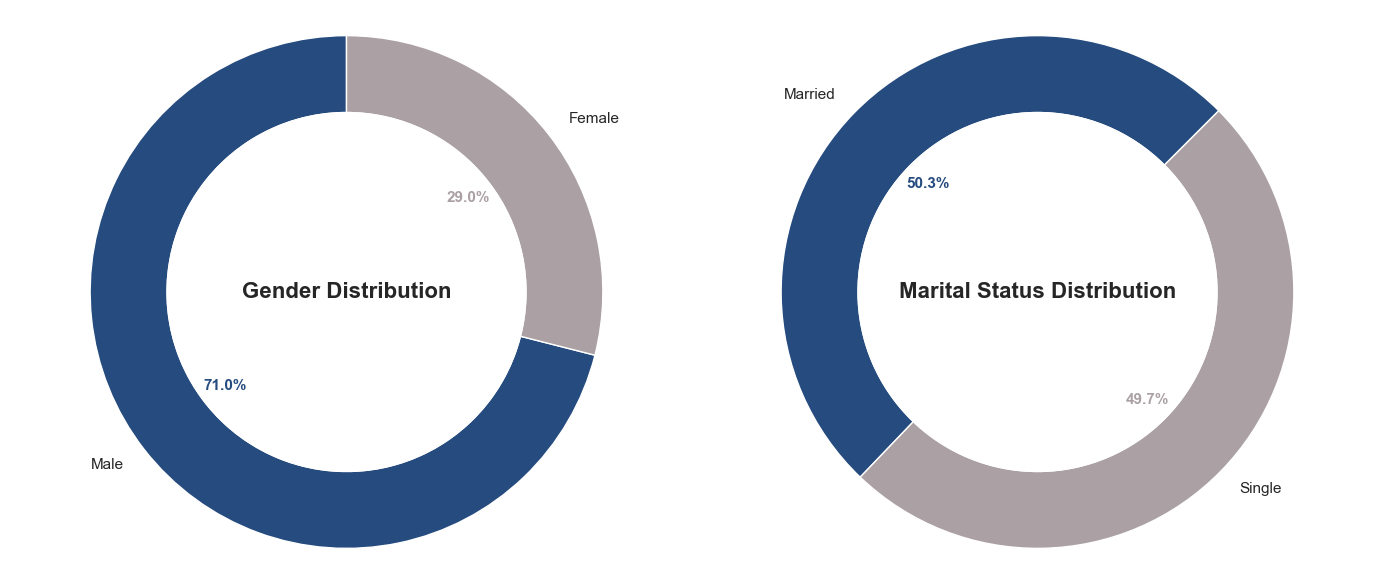

In [324]:
# Map 'F' to 'Female' and 'M' to 'Male'
cleaned_df['Gender'] = cleaned_df['Gender'].map({'F': 'Female', 'M': 'Male'})

# Map 'M' to 'Married' and 'S' to 'Single'
cleaned_df['MaritalStatus'] = cleaned_df['MaritalStatus'].map({'M': 'Married', 'S': 'Single'})

# Count the number of occurrences for each gender and marital status
gender_counts = cleaned_df['Gender'].value_counts()
marital_counts = cleaned_df['MaritalStatus'].value_counts()

# Function to format the percentage text
def func(pct, allvalues):
    return f'{pct:.1f}%'

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Create Gender Donut Chart
wedges, texts, autotexts = axes[0].pie(gender_counts, 
                                        labels=gender_counts.index, 
                                        autopct=lambda pct: func(pct, gender_counts), 
                                        startangle=90, 
                                        colors=['#254b7f', '#ABA1A5'], 
                                        wedgeprops=dict(width=0.3))

# Customize the appearance of the percentage text for Gender
for i, a in enumerate(autotexts):
    a.set_fontsize(11)  # Set font size
    a.set_color(wedges[i].get_facecolor())  # Set color to match the wedge
    a.set_fontweight('bold')  # Set font weight to bold

# Add a circle at the center of the pie to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[0].add_artist(centre_circle)

# Add title at the center for Gender
axes[0].text(0, 0, 'Gender Distribution', 
             horizontalalignment='center', 
             verticalalignment='center', 
             fontsize=16, 
             fontweight='bold')

axes[0].axis('equal')  # Equal aspect ratio ensures that donut chart is a circle.

# Create Marital Status Donut Chart
wedges, texts, autotexts = axes[1].pie(marital_counts, 
                                        labels=marital_counts.index, 
                                        autopct=lambda pct: func(pct, marital_counts), 
                                        startangle=45, 
                                        colors=['#254b7f', '#ABA1A5'], 
                                        wedgeprops=dict(width=0.3))

# Customize the appearance of the percentage text for Marital Status
for i, a in enumerate(autotexts):
    a.set_fontsize(11)  # Set font size
    a.set_color(wedges[i].get_facecolor())  # Set color to match the wedge
    a.set_fontweight('bold')  # Set font weight to bold

# Add a circle at the center of the pie to create a donut chart for Marital Status
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
axes[1].add_artist(centre_circle)

# Add title at the center for Marital Status
axes[1].text(0, 0, 'Marital Status Distribution', 
             horizontalalignment='center', 
             verticalalignment='center', 
             fontsize=16, 
             fontweight='bold')

axes[1].axis('equal')  # Equal aspect ratio ensures that donut chart is a circle.

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

### Create an Age Column, Clean Rate Column to make Salary Column

In [325]:
# Convert 'BirthDate' to datetime
cleaned_df['BirthDate'] = pd.to_datetime(cleaned_df['BirthDate'])

# Ensure 'Rate' is a string before removing the dollar sign and converting to numeric
cleaned_df['Rate'] = cleaned_df['Rate'].astype(str).str.replace('$', '').str.strip()
cleaned_df['Rate'] = pd.to_numeric(cleaned_df['Rate'], errors='coerce')

# Calculate Age
current_date = datetime.now()
cleaned_df['Age'] = (current_date - cleaned_df['BirthDate']).dt.days // 365

# Calculate Salary based on hourly rate (assuming 2080 working hours in a year)
cleaned_df['Salary'] = cleaned_df['Rate'] * 2080  # Annual salary


In [327]:
cleaned_df['Age'].min()

33

In [328]:
cleaned_df['Age'].max()

73

In [329]:
cleaned_df['Age'].mean()

45.827586206896555

### Make a Scatterplot of Age & Salary

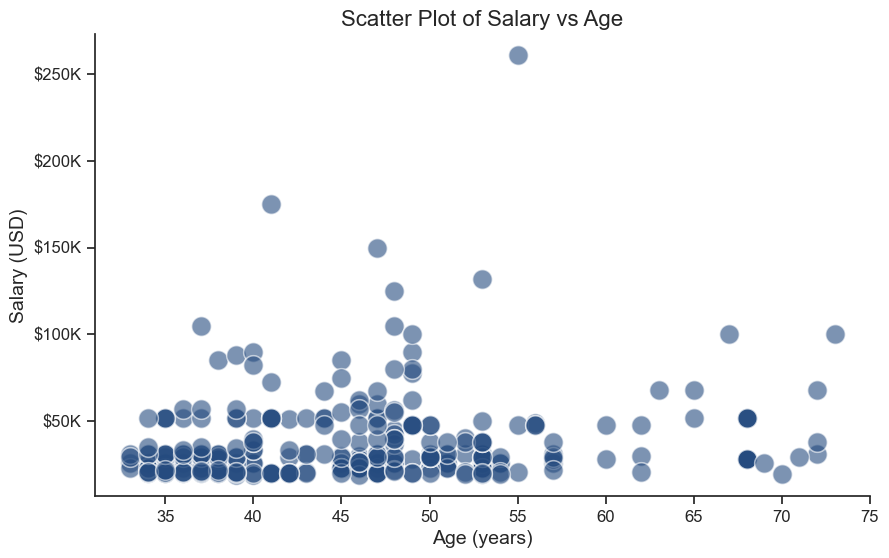

In [309]:
# Drop rows with NaN values in 'Salary' or 'Age' for the plot
plot_df = cleaned_df.dropna(subset=['Salary', 'Age'])

# Set the visual style
sns.set(style='ticks')

# Create a scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=plot_df, x='Age', y='Salary', color='#254b7f', s=200, alpha=0.6)

# Customize the plot
plt.title('Scatter Plot of Salary vs Age', fontsize=16)
plt.xlabel('Age (years)', fontsize=14)
plt.ylabel('Salary (USD)', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Customize the y-axis to show currency
def currency_format(y, pos):
    return f'${int(y/1000)}K' if y >= 1000 else f'${int(y)}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(currency_format))

# Show the plot
sns.despine()  # Remove the top and right spines from plot
plt.show()

### Create a Bar Graph Showing Employees by Shift

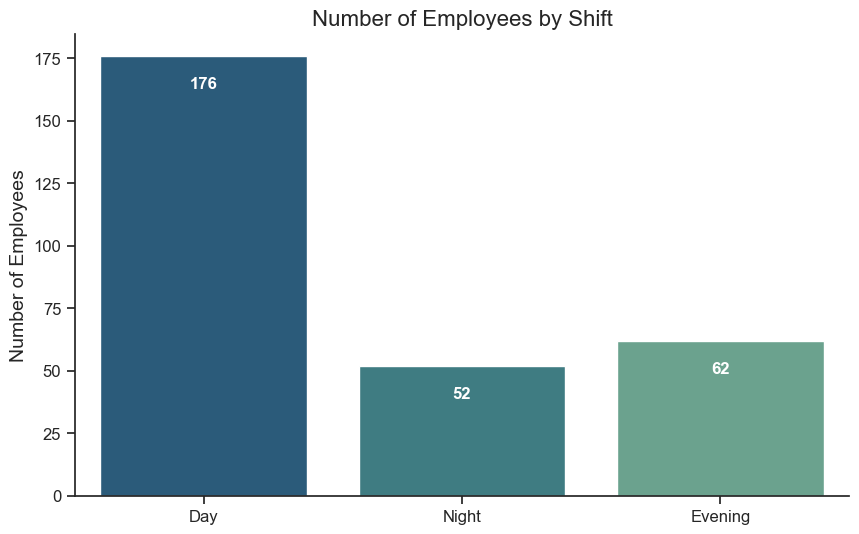

In [310]:
# Set the visual style
sns.set(style="ticks")

# Create a bar plot
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=cleaned_df, x='ShiftName', palette='crest_r', hue='ShiftName')

# Add labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, -20),  # Offset the text a bit above the bar
                textcoords='offset points', 
                fontsize=12, color='white', fontweight='bold')

# Customize the plot
plt.title('Number of Employees by Shift', fontsize=16)
plt.xlabel('')
plt.ylabel('Number of Employees', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
sns.despine()  # Remove the top and right spines from plot
plt.show()

### Create a map of Employee Locations - Timing Issue

### Bar Graph showing Departments and Number of Employees

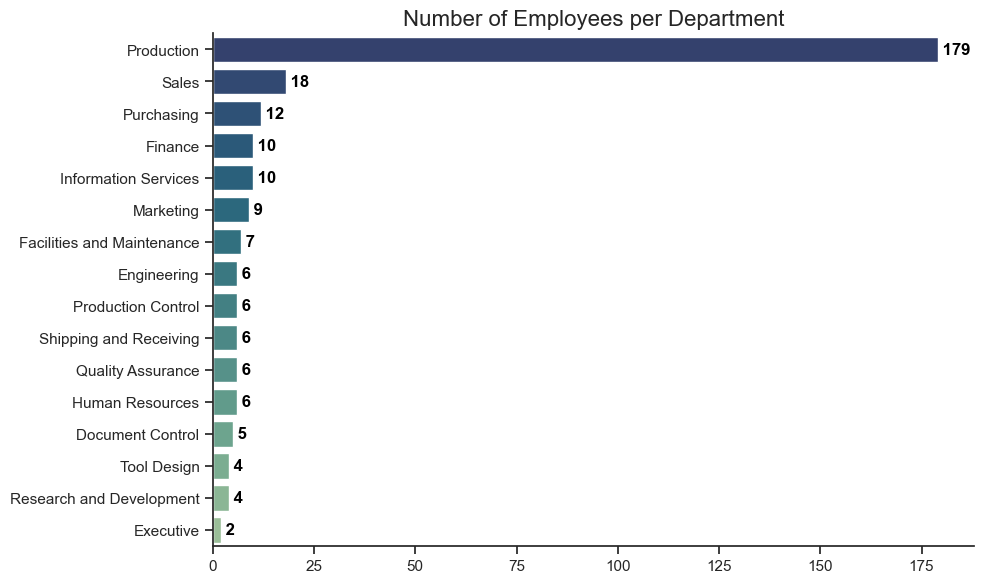

In [311]:
# Count the number of employees per department
department_counts = cleaned_df['DepartmentName'].value_counts().reset_index()
department_counts.columns = ['DepartmentName', 'Employee Count']

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Employee Count', y='DepartmentName', data=department_counts, palette='crest_r', hue='DepartmentName')

# Add labels to the end of each bar
for index, value in enumerate(department_counts['Employee Count']):
    plt.text(value, index, f' {value}', color='black', va='center', fontsize=12, fontweight='bold')

# Add labels and title
plt.xlabel('')
plt.ylabel('')
plt.title('Number of Employees per Department', fontsize=16)

# Display the plot
sns.despine()  # Remove the top and right spines from plot
plt.tight_layout()
plt.show()

### Create a Visualization of the Organization Chart

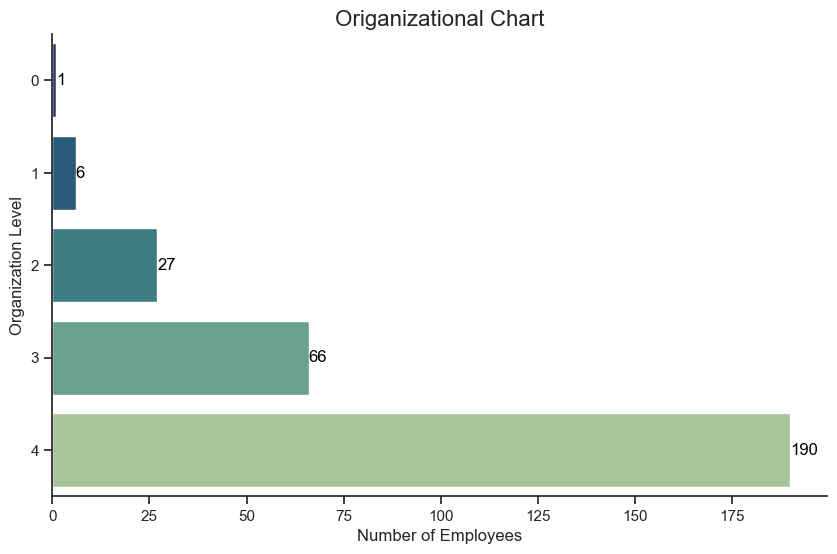

In [317]:
# Fill NaN values in 'OrganizationLevel' with 0
cleaned_df['OrganizationLevel'] = cleaned_df['OrganizationLevel'].fillna(0)

# Count the number of employees per organizational level
org_level_counts = cleaned_df['OrganizationLevel'].value_counts().reset_index()
org_level_counts.columns = ['OrganizationLevel', 'Employee Count']

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Employee Count', y='OrganizationLevel', data=org_level_counts, palette='crest_r', orient='h', hue='OrganizationLevel', legend=False)

# Set x-axis to show only whole numbers using FuncFormatter
plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: int(x)))  # Now accepts both arguments

# Add labels and title
plt.xlabel('Number of Employees')
plt.ylabel('Organization Level')
plt.title('Origanizational Chart', size=16)

# Remove the top and right spines from the plot
sns.despine()

# Add labels on the bars
for index, value in enumerate(org_level_counts['Employee Count']):
    plt.text(value, len(org_level_counts) - 1 - index, str(value), va='center', fontsize=12, color='black')

# Display the plot
plt.show()






### Create a Chart showing Median Salary by Department

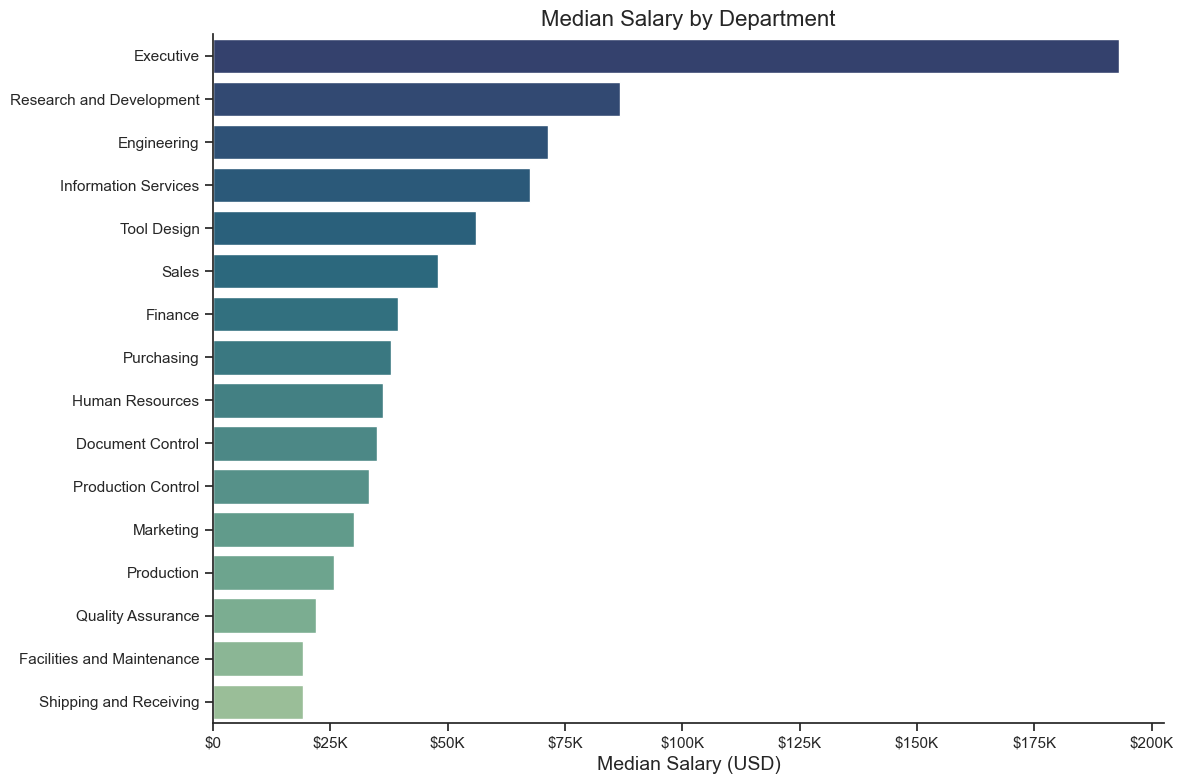

In [313]:
# Calculate the median salary by department
median_salary_by_department = cleaned_df.groupby('DepartmentName')['Salary'].median().reset_index()

# Sort the values for better visualization
median_salary_by_department = median_salary_by_department.sort_values(by='Salary', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Salary', y='DepartmentName', data=median_salary_by_department, palette='crest_r', hue='DepartmentName')

# Add labels and title
plt.xlabel('Median Salary (USD)', fontsize=14)
plt.ylabel('')
plt.title('Median Salary by Department', fontsize=16)

# Customize the x-axis to show currency
plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${int(x/1000)}K' if x >= 1000 else f'${int(x)}'))

# Display the plot
sns.despine()
plt.tight_layout()
plt.show()

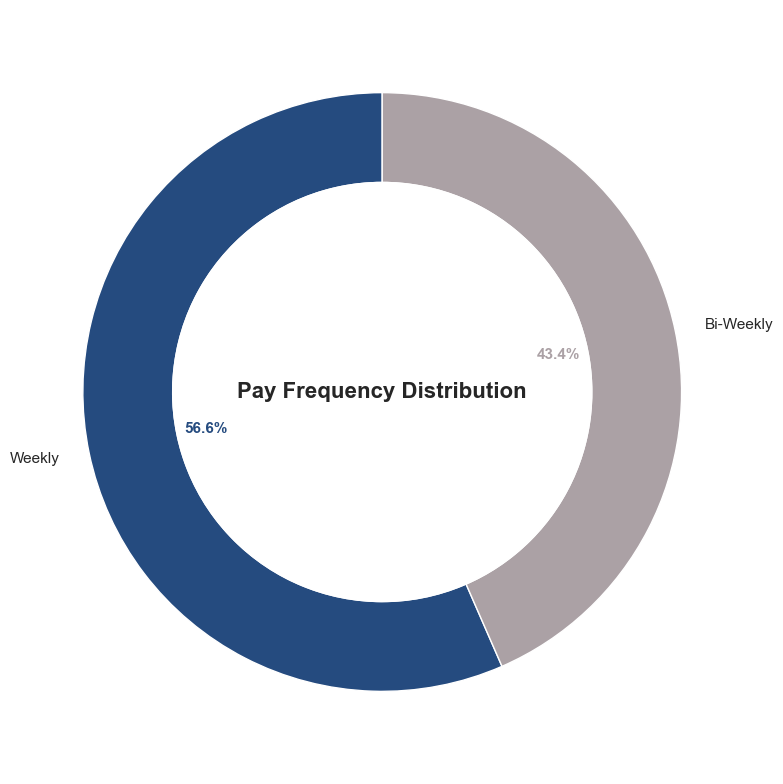

In [314]:
# Map the pay frequencies to their respective labels
cleaned_df['PayFrequency'] = cleaned_df['PayFrequency'].map({1: 'Weekly', 2: 'Bi-Weekly'})

# Count the occurrences of each pay frequency
pay_frequency_counts = cleaned_df['PayFrequency'].value_counts()

# Function to format the percentage text
def func(pct, allvalues):
    return f'{pct:.1f}%'

# Create a pie chart
fig, ax = plt.subplots(figsize=(8, 8))
wedges, texts, autotexts = ax.pie(pay_frequency_counts, 
                                  labels=pay_frequency_counts.index, 
                                  autopct=lambda pct: func(pct, pay_frequency_counts), 
                                  startangle=90, 
                                  colors=['#254b7f', '#ABA1A5'], 
                                  wedgeprops=dict(width=0.3))

# Customize the appearance of the percentage text
for i, a in enumerate(autotexts):
    a.set_fontsize(11)  # Set font size
    a.set_color(wedges[i].get_facecolor())  # Set color to match the wedge
    a.set_fontweight('bold')  # Set font weight to bold

# Add a circle at the center of the pie to create a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
ax.add_artist(centre_circle)

# Add title at the center
ax.text(0, 0, 'Pay Frequency Distribution', 
        horizontalalignment='center', 
        verticalalignment='center', 
        fontsize=16, 
        fontweight='bold')

ax.axis('equal')  # Equal aspect ratio ensures that donut chart is a circle.

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

C:\Users\rbrod\AppData\Local\Temp\ipykernel_5928\2590834467.py:26: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



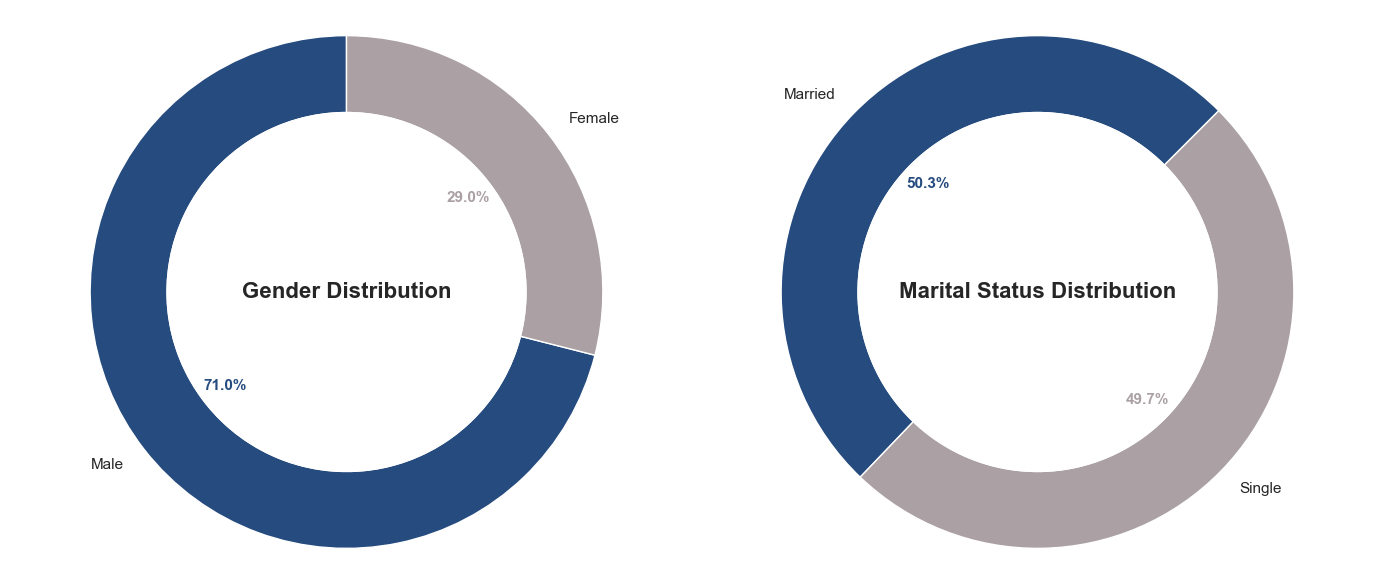

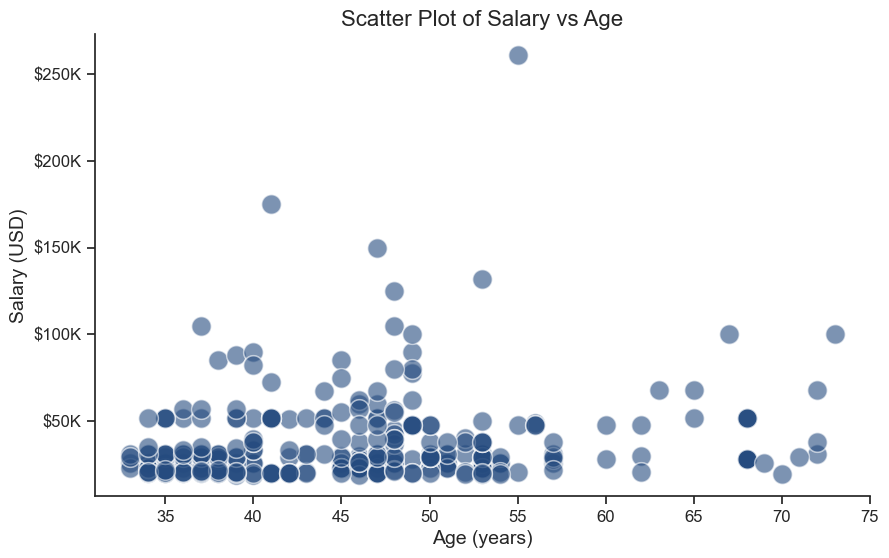

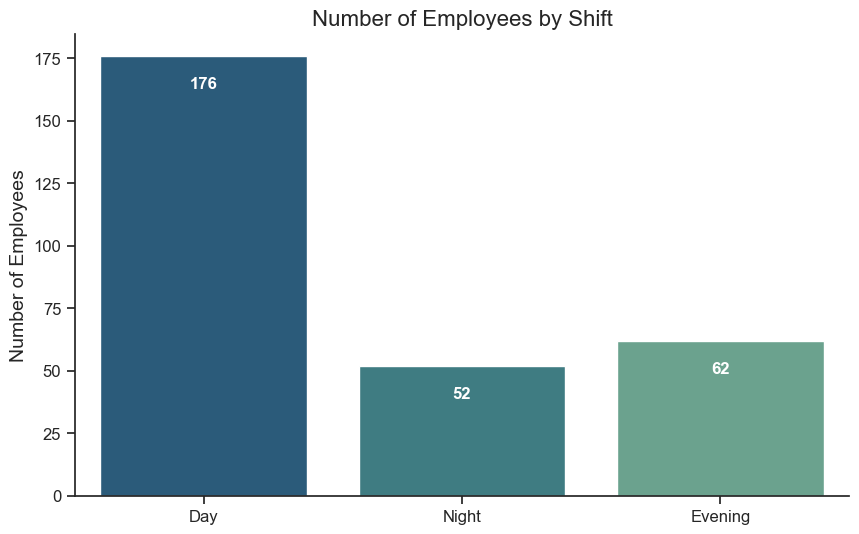

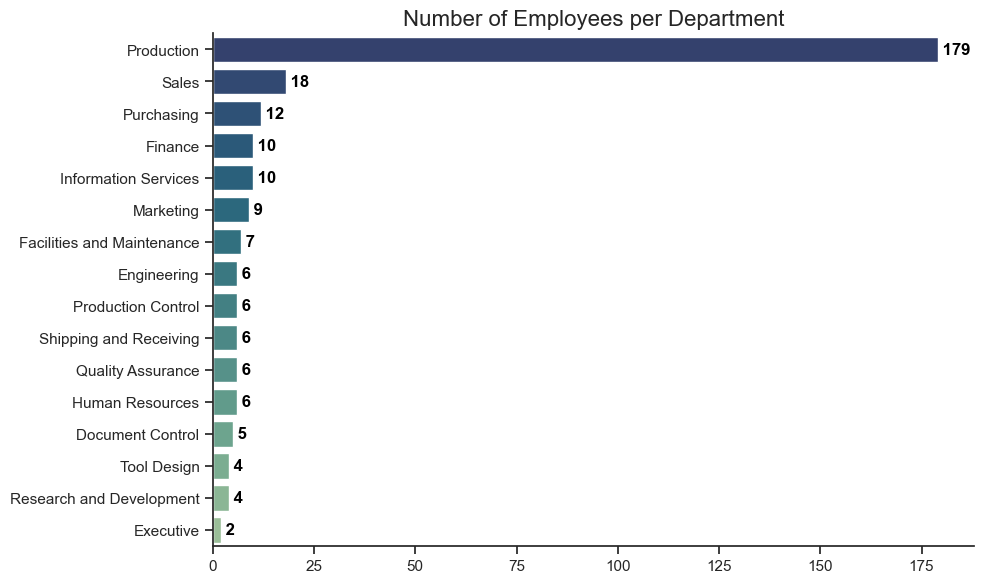

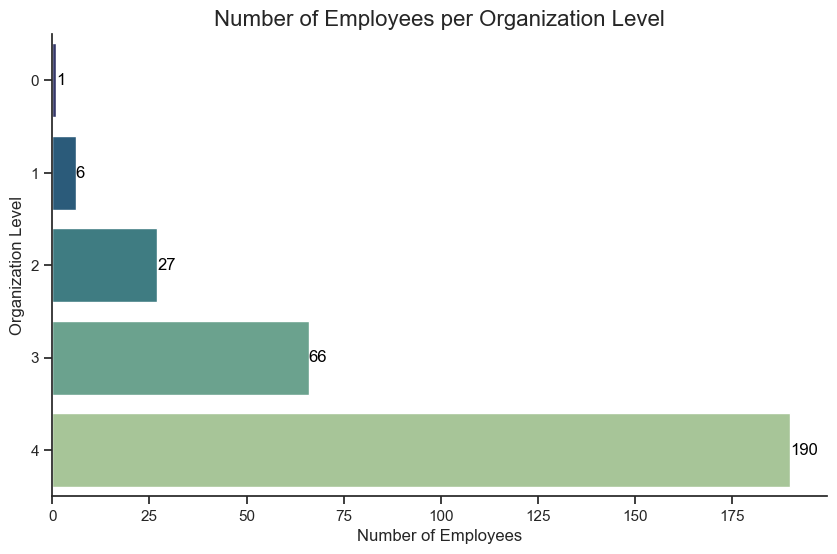

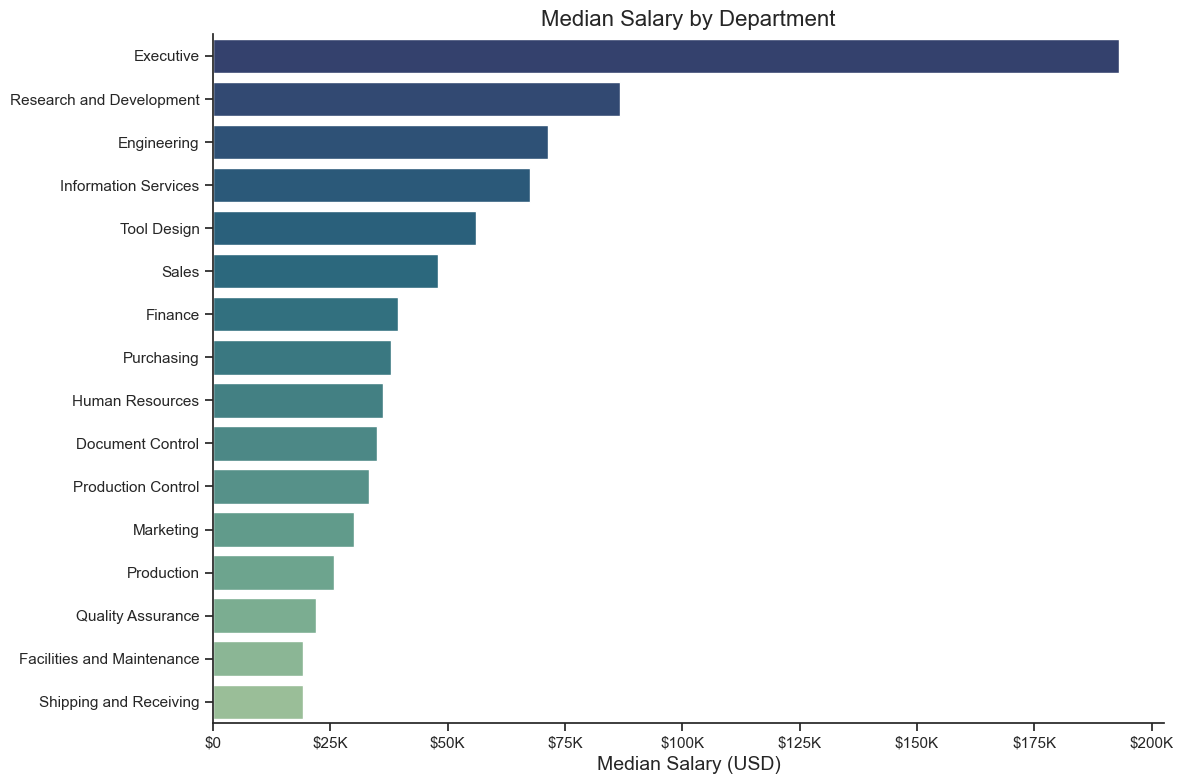

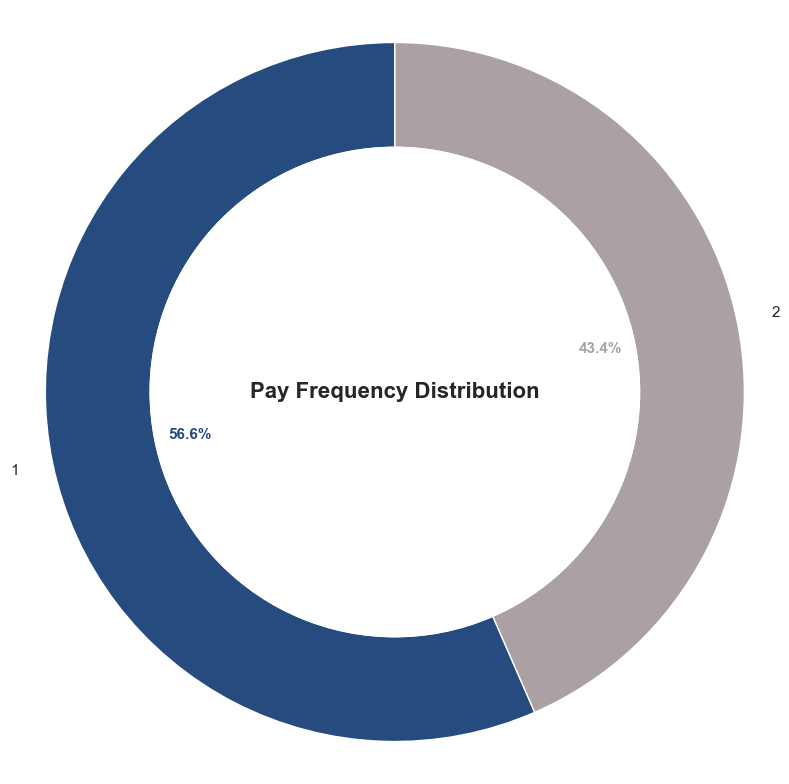

BokehModel(combine_events=True, render_bundle={'docs_json': {'f5ef5b75-00ea-46a3-a239-09a086e47633': {'version…

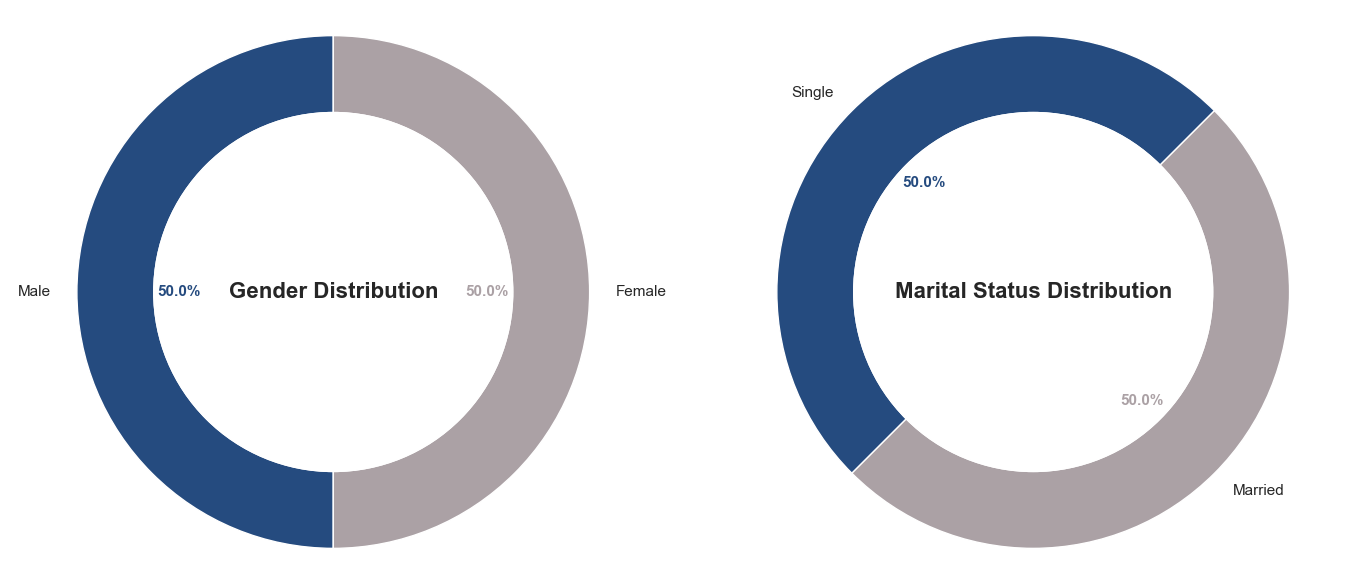

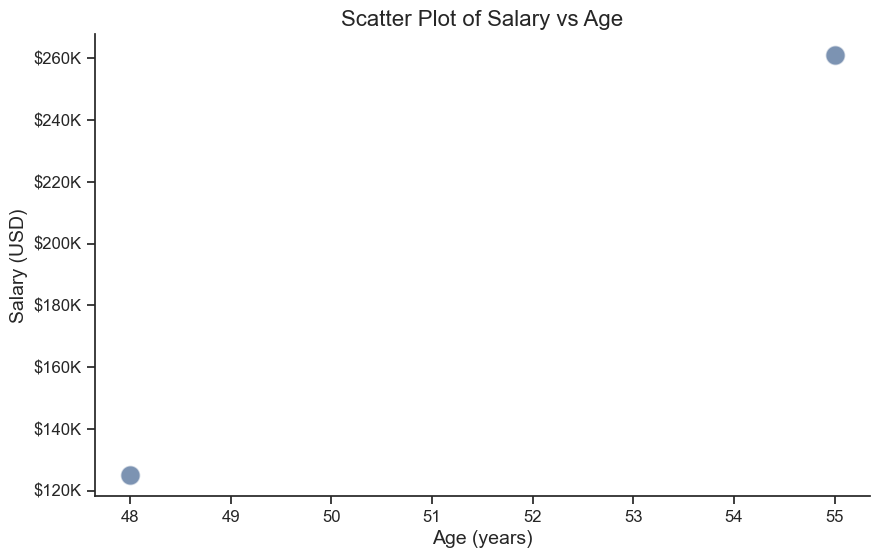

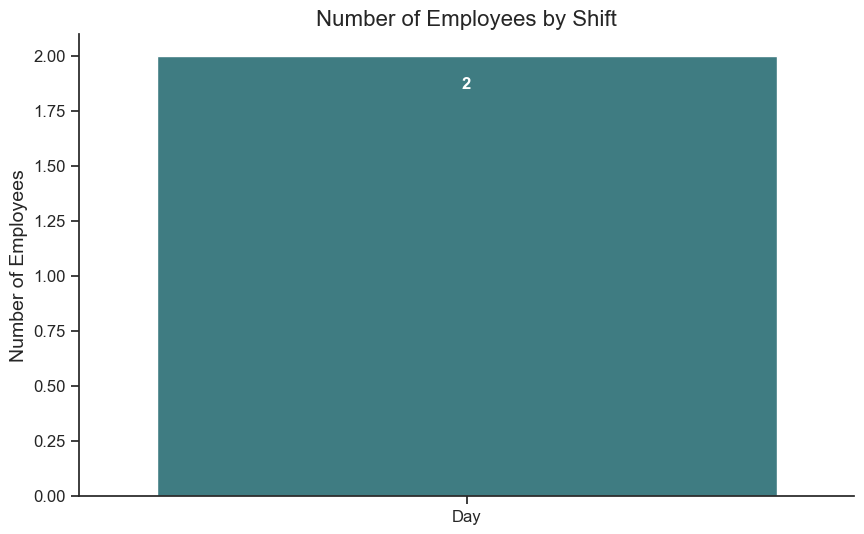

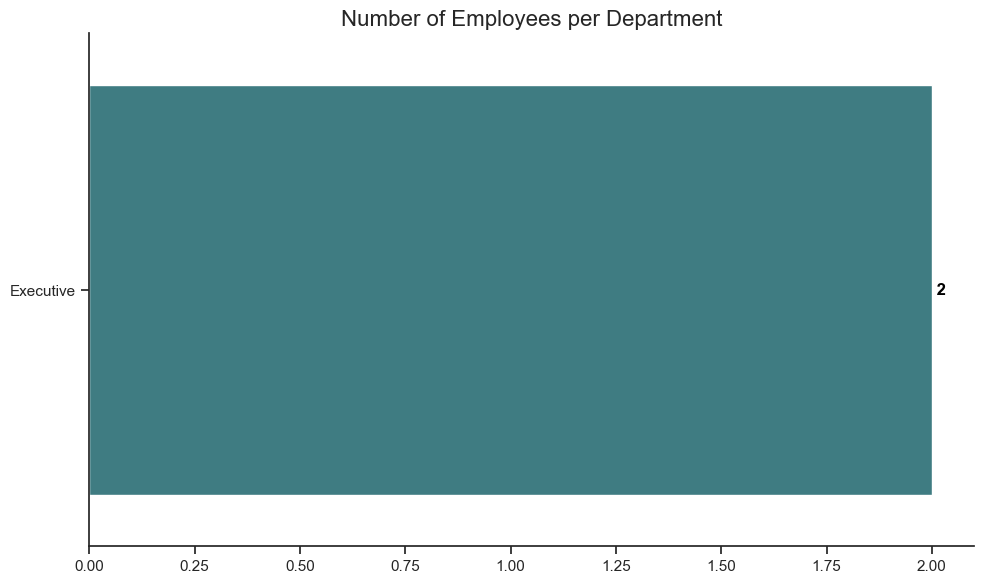

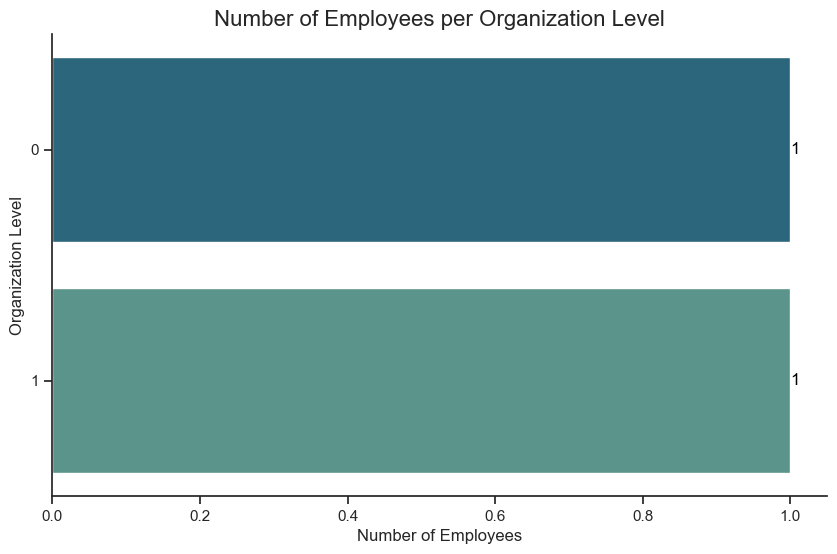

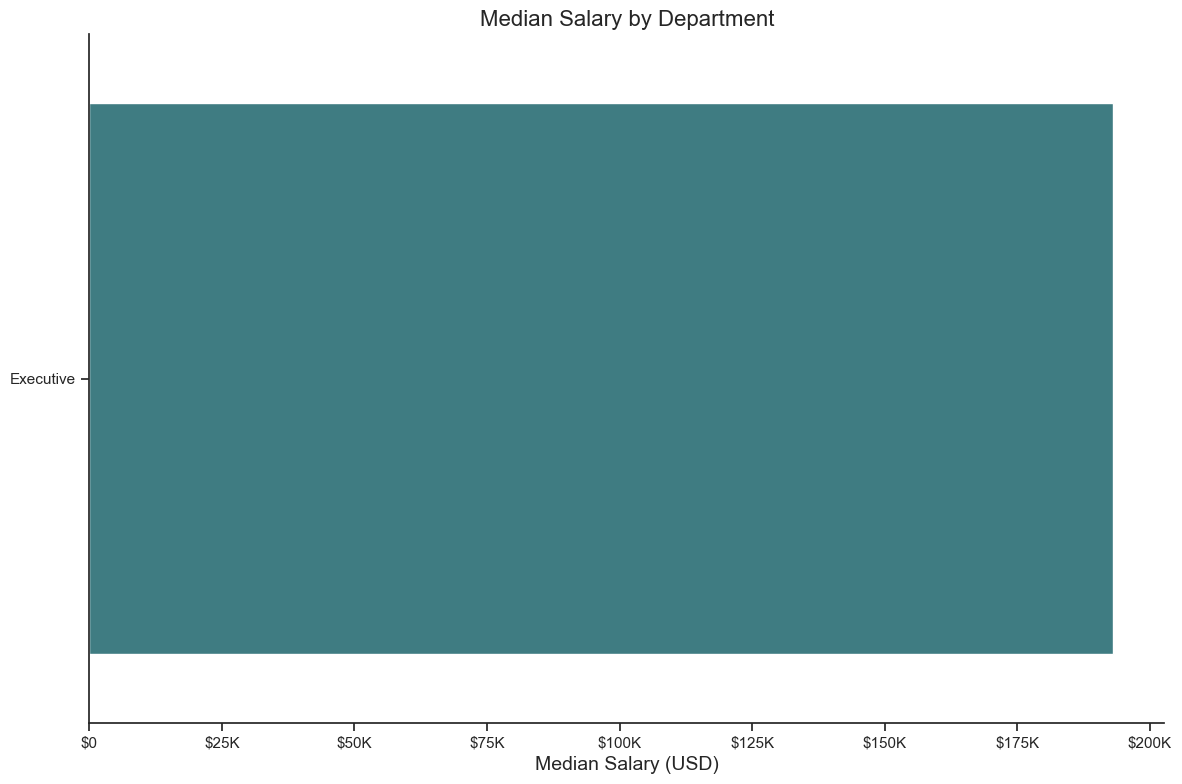

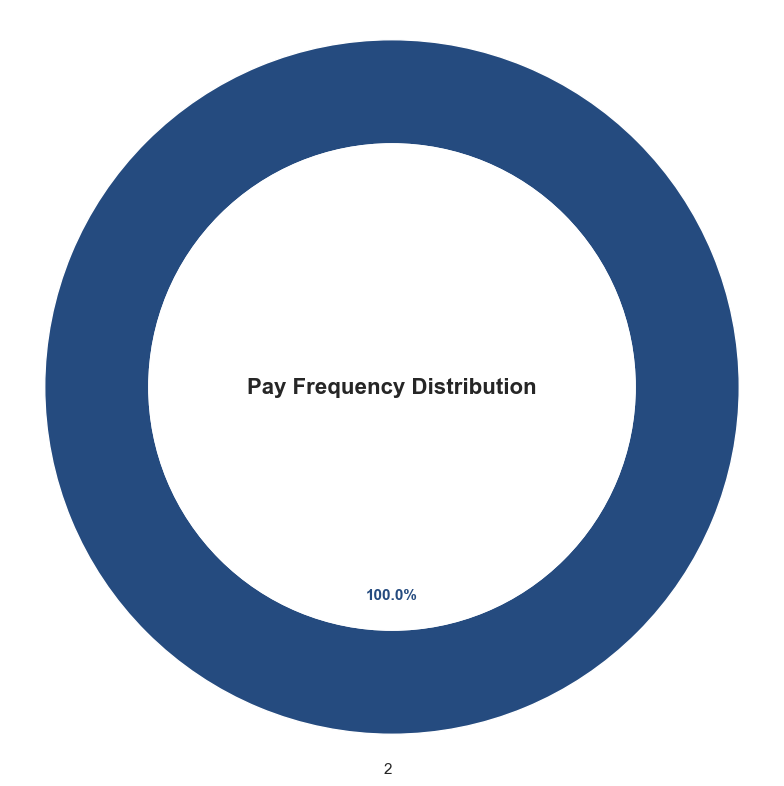

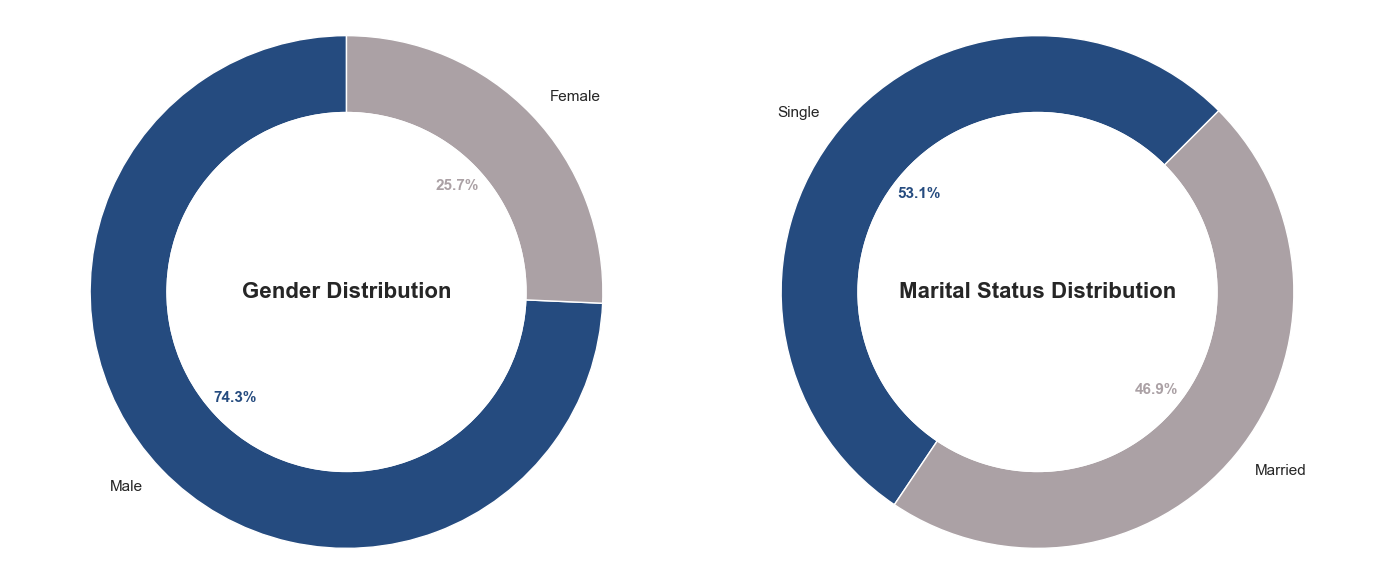

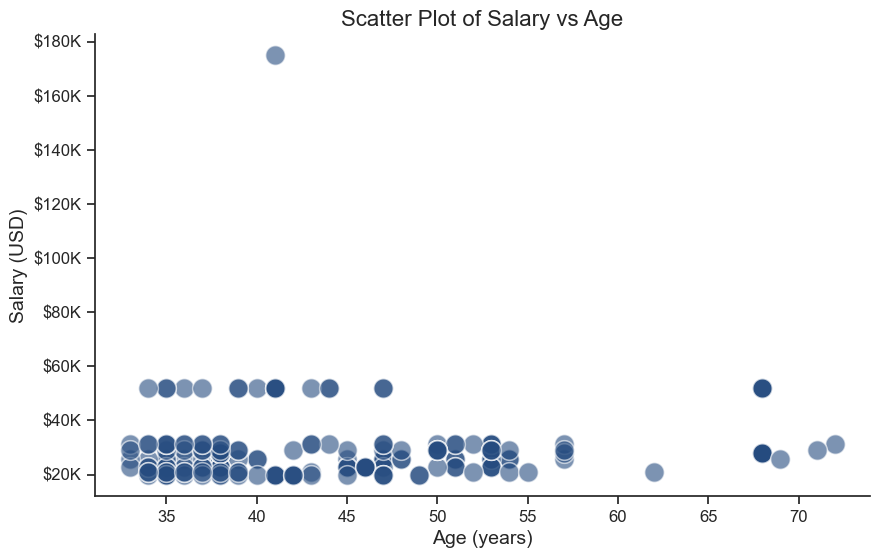

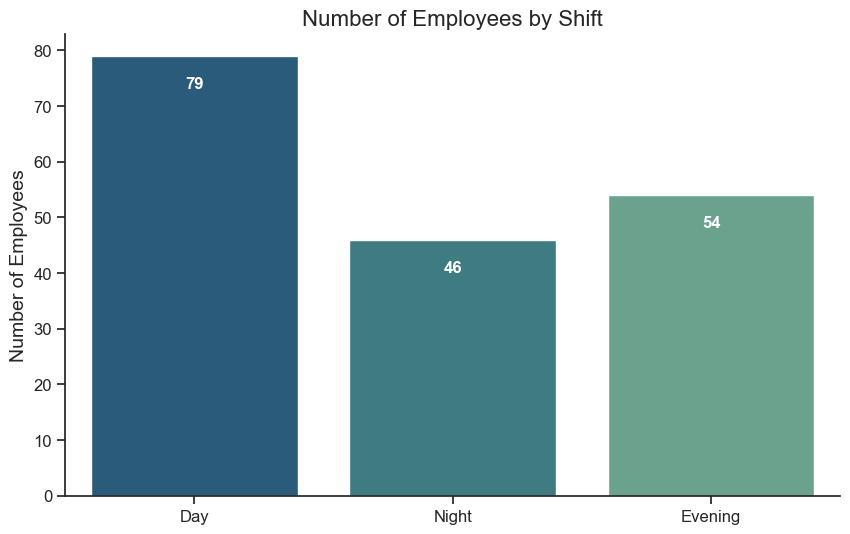

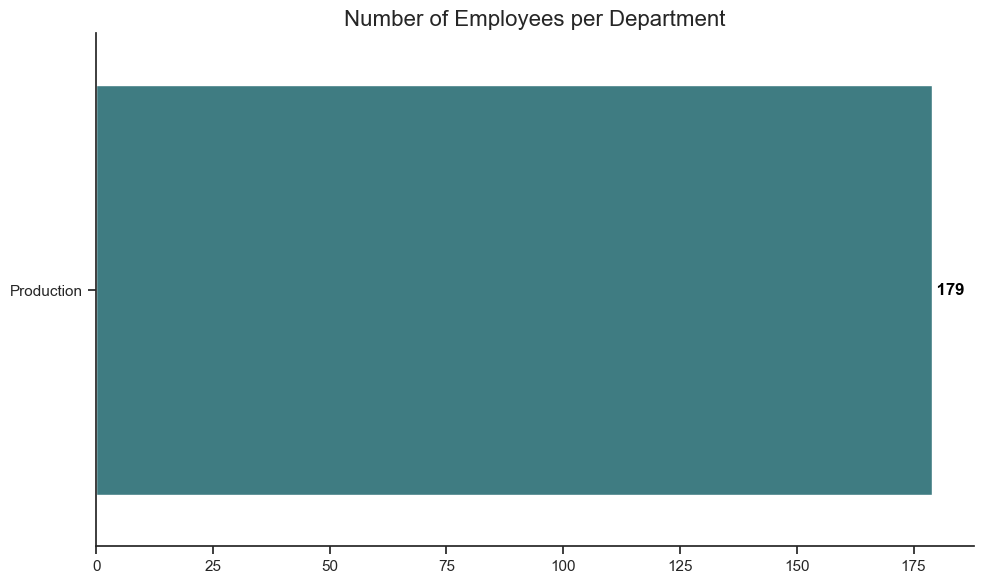

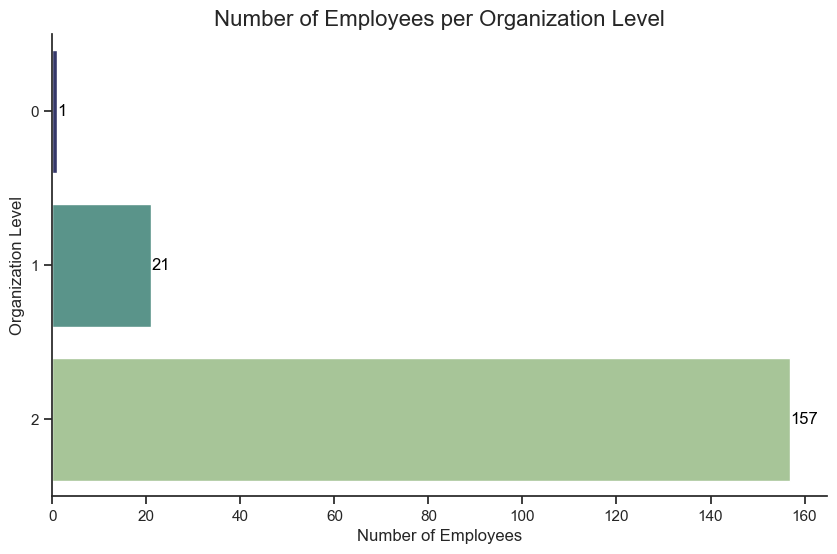

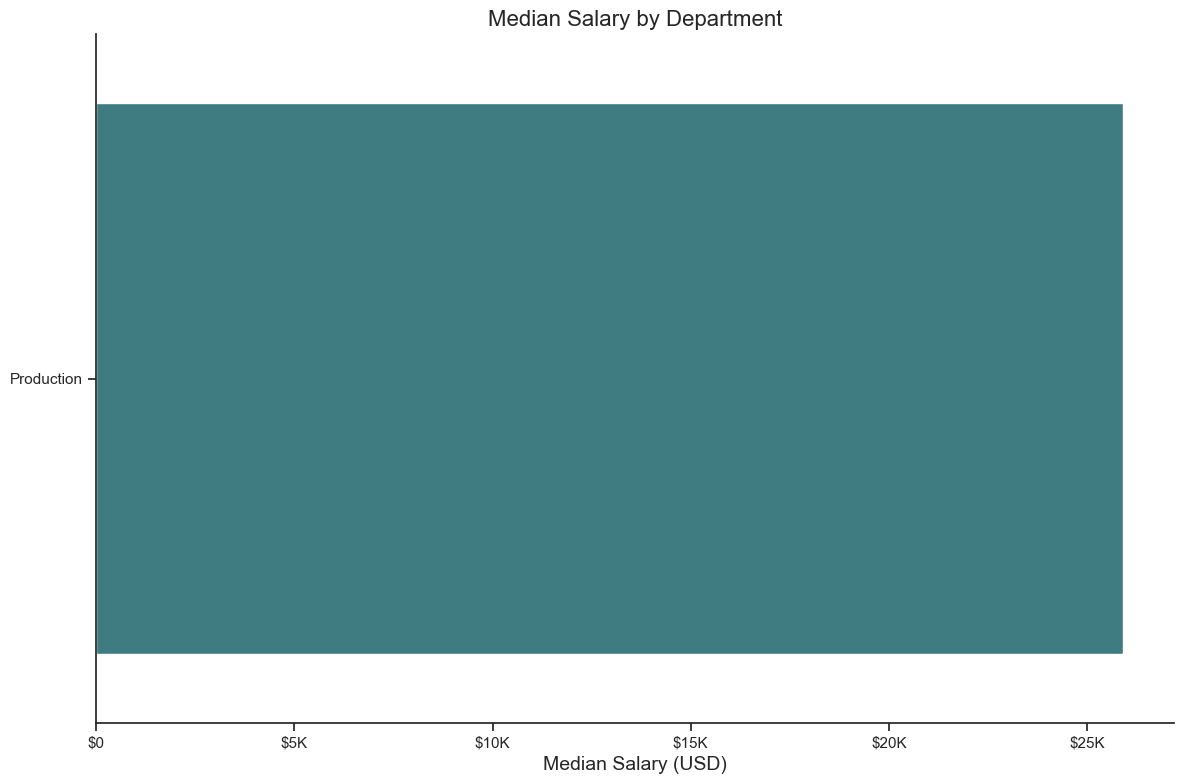

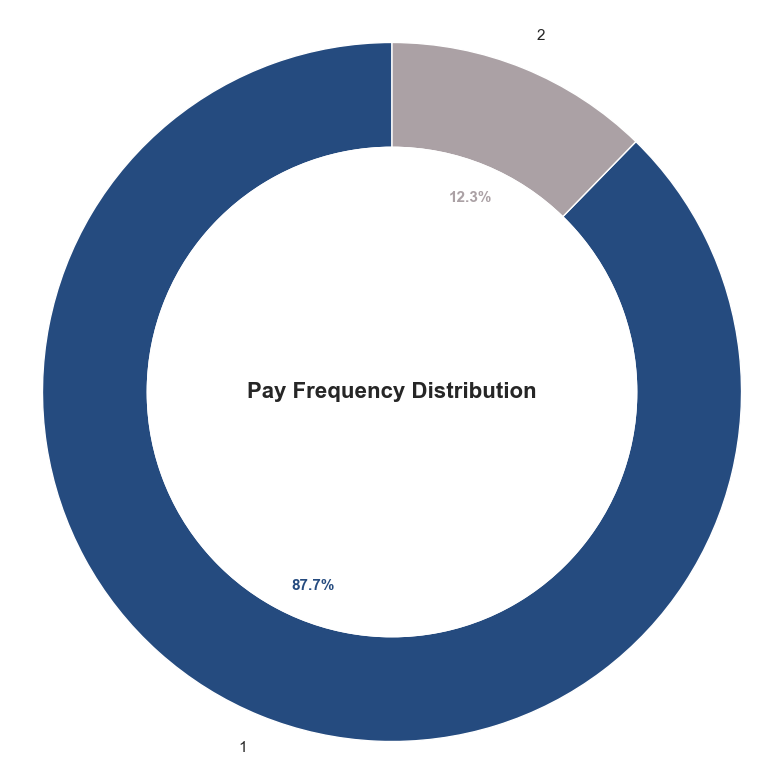

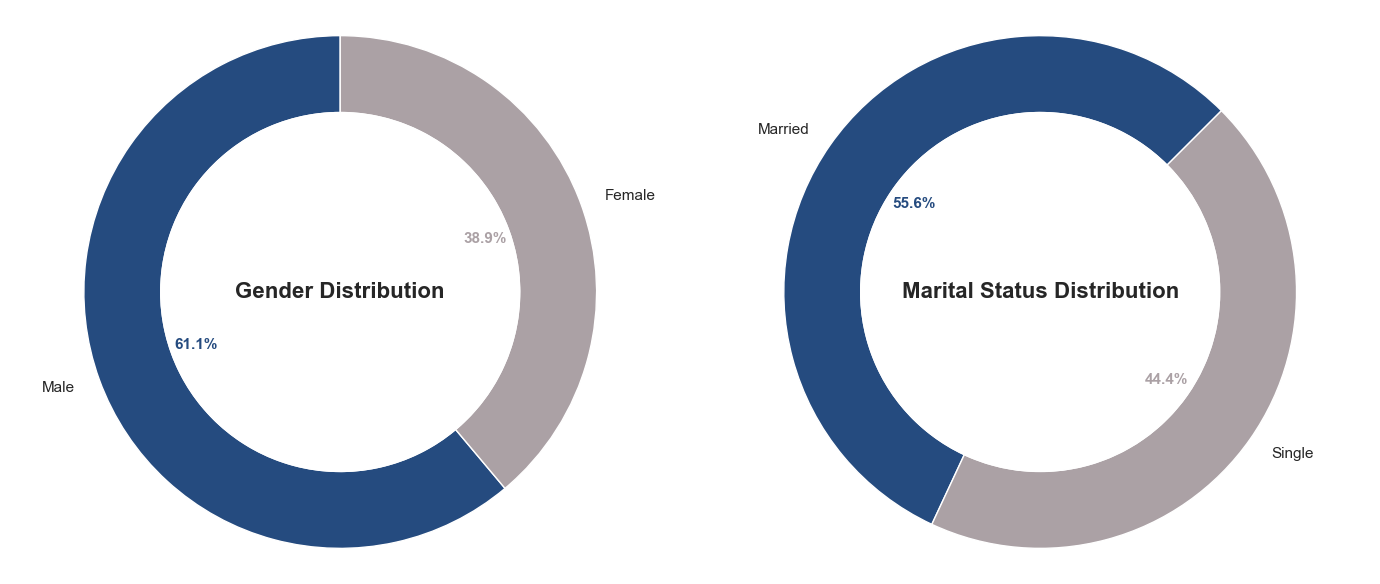

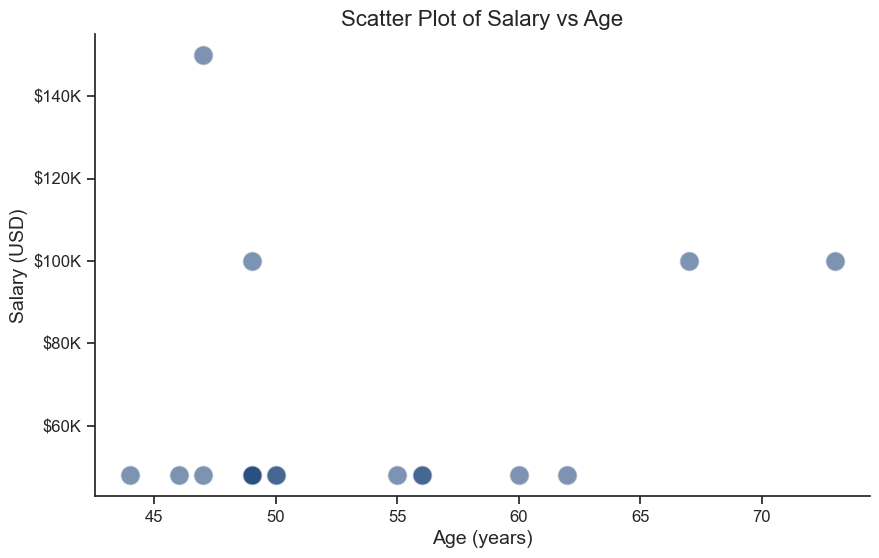

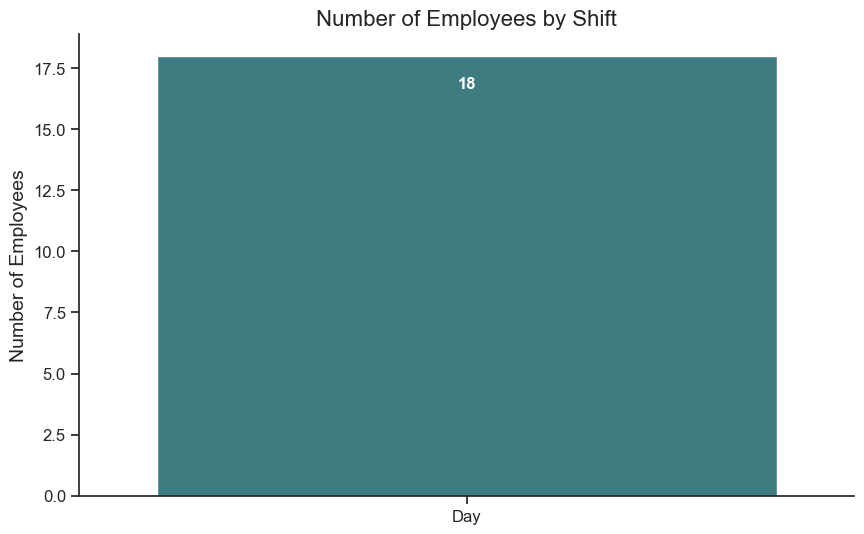

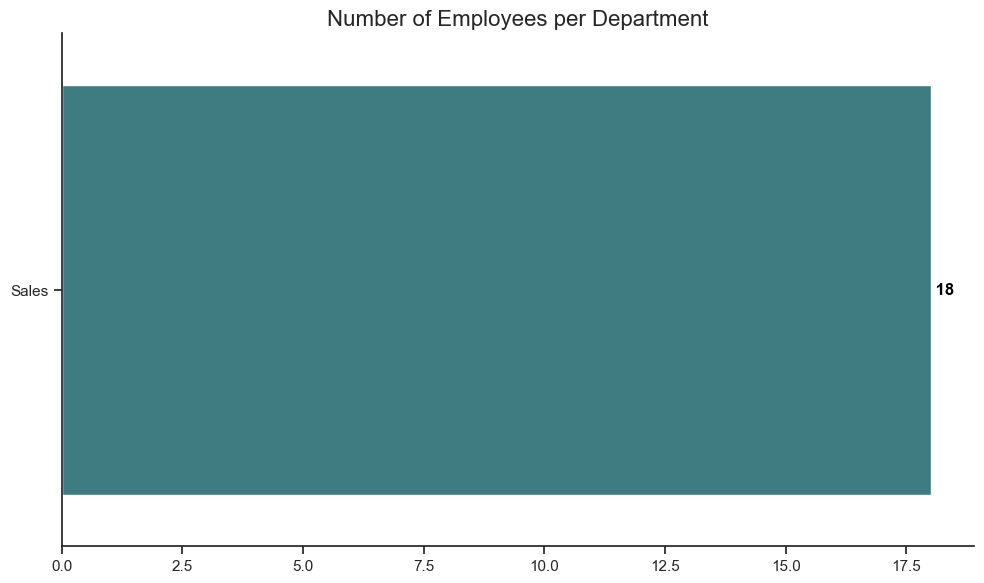

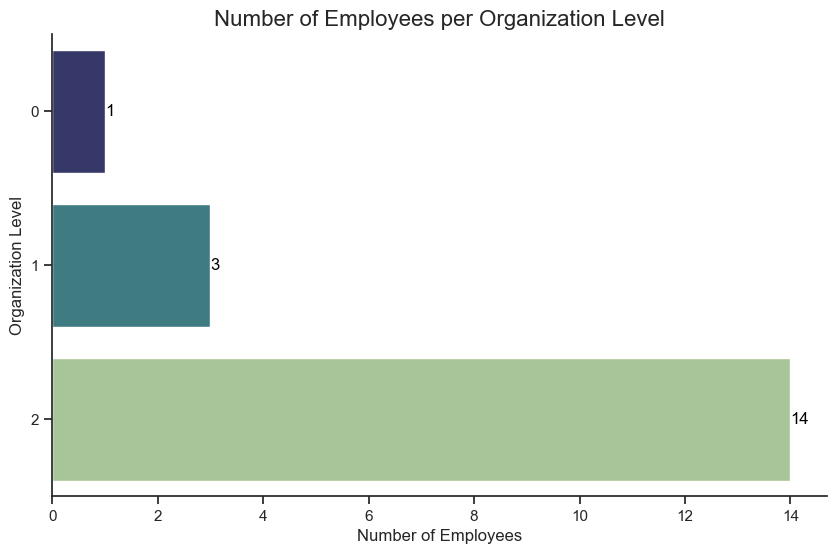

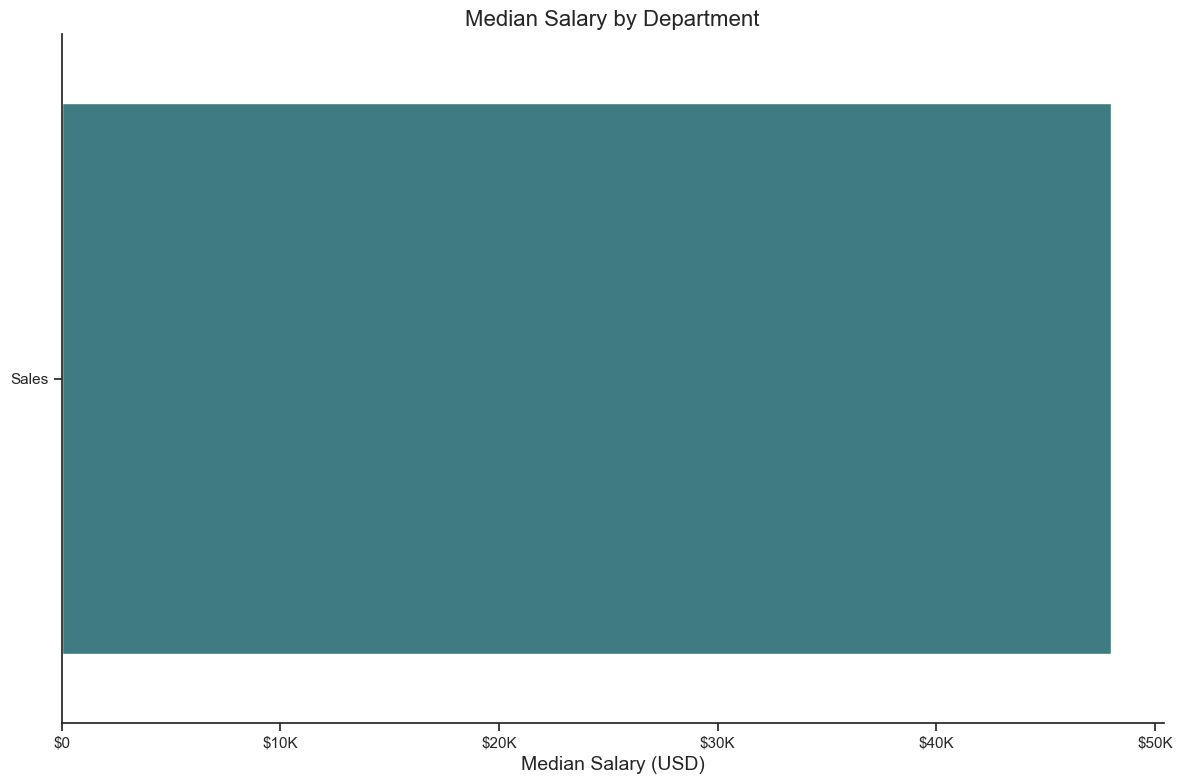

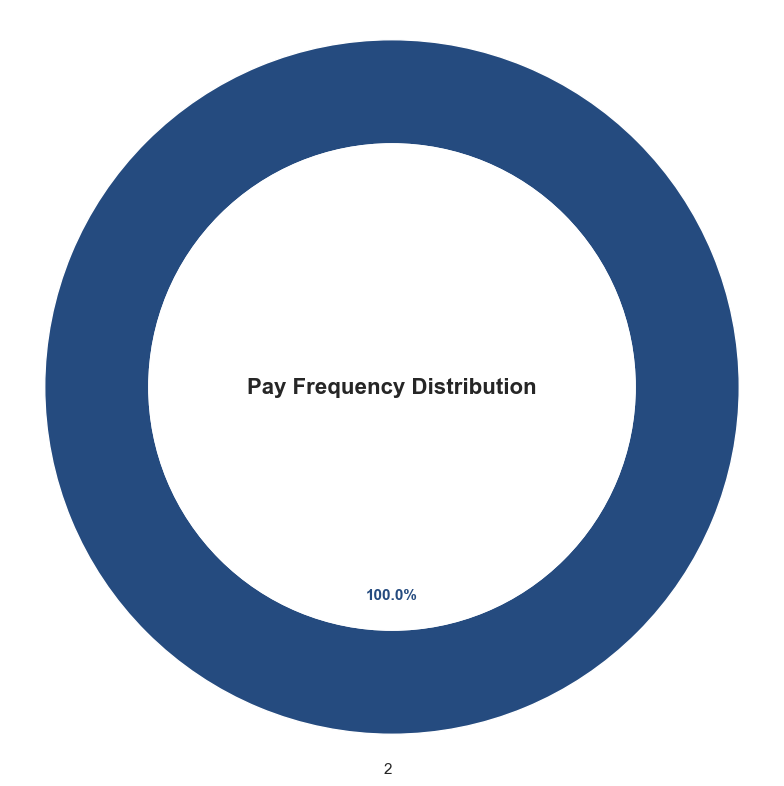

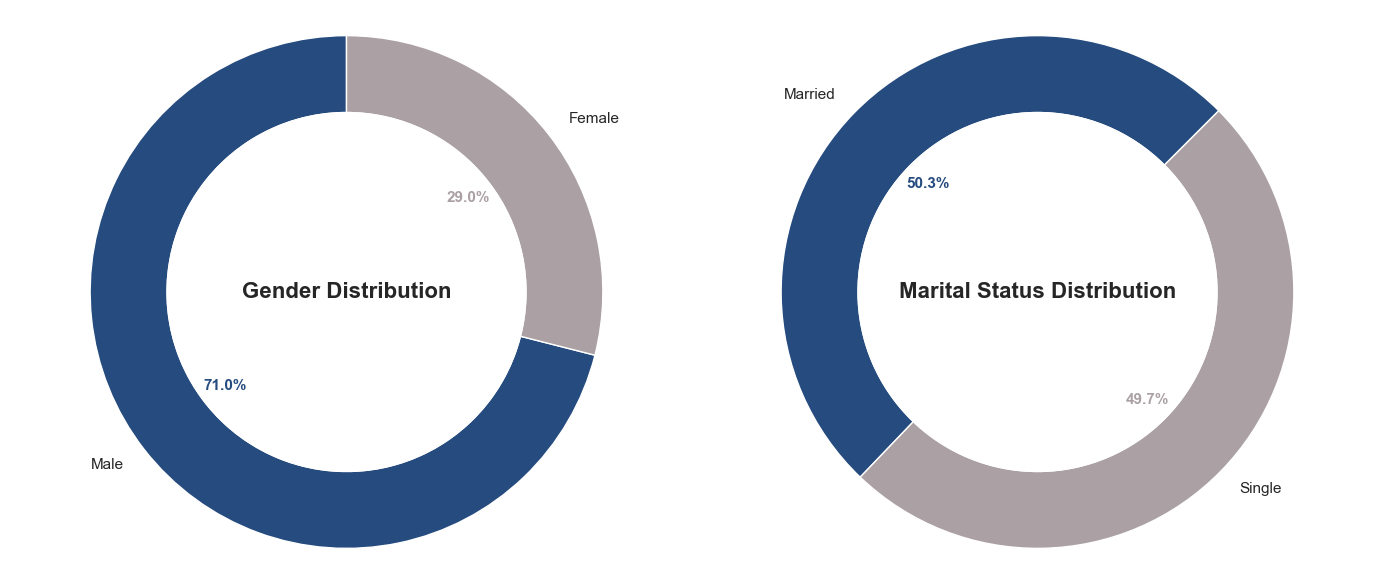

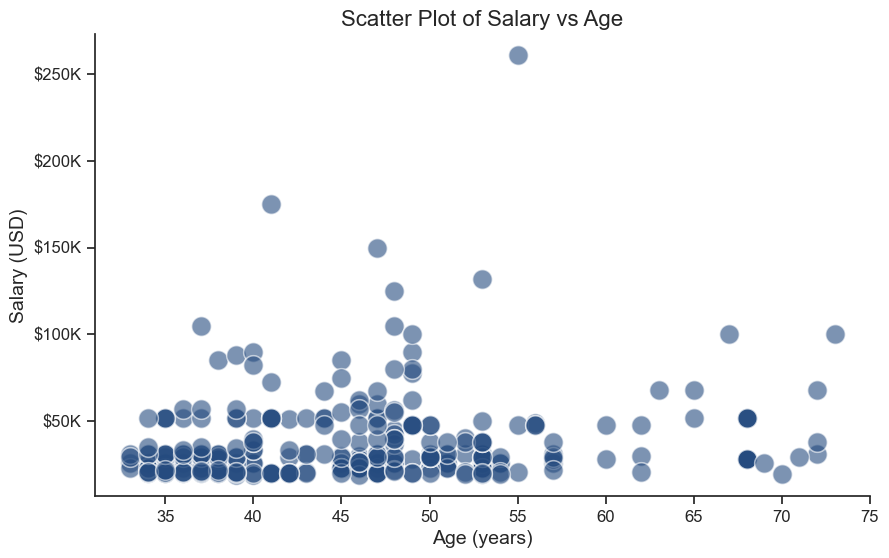

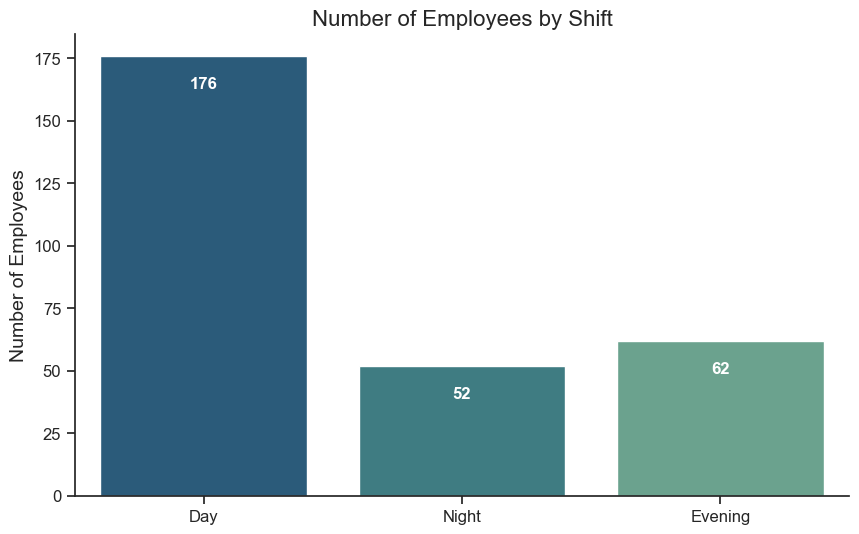

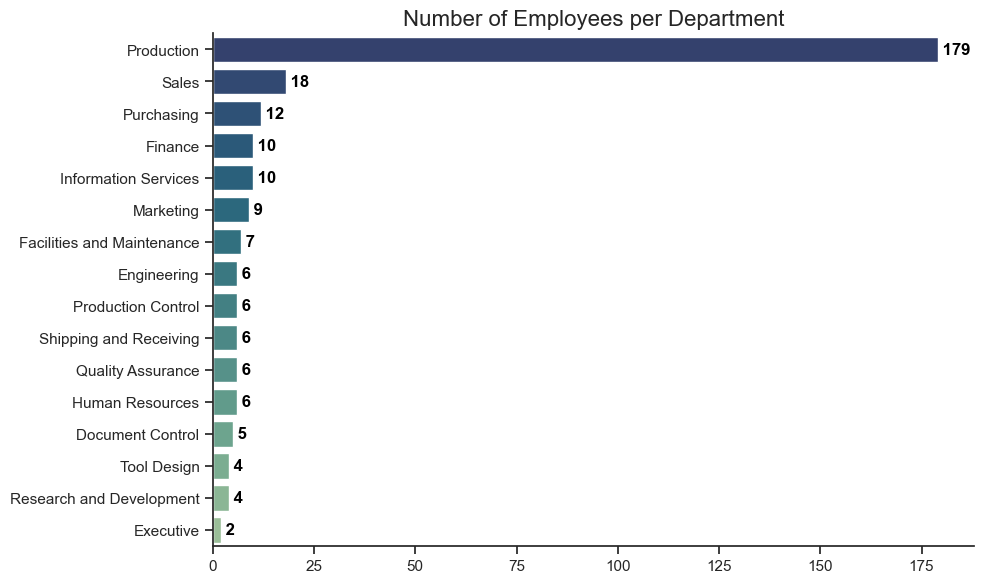

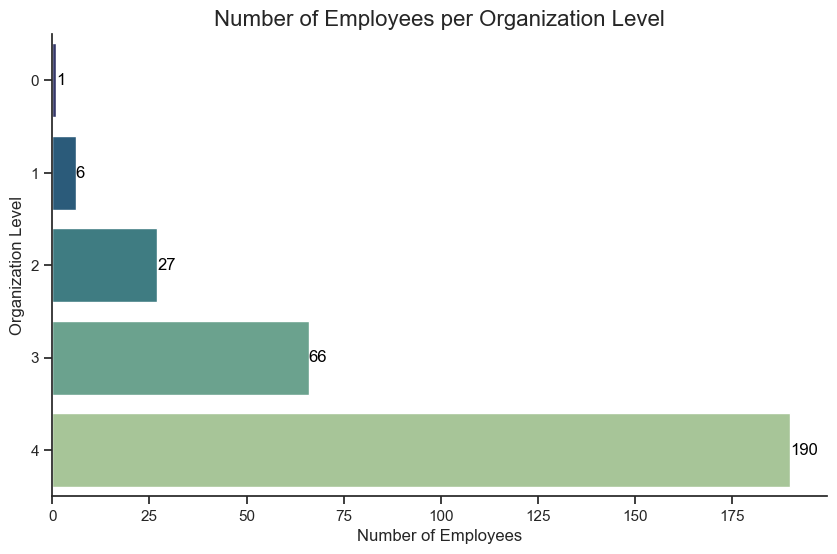

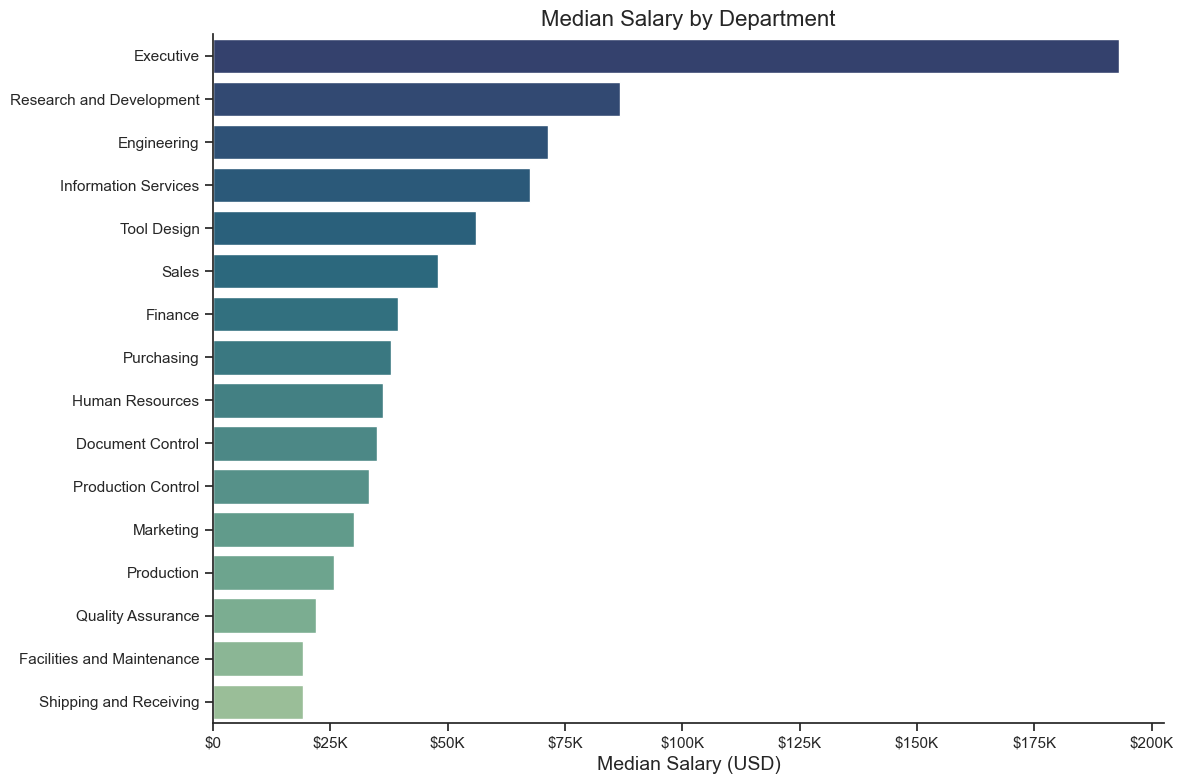

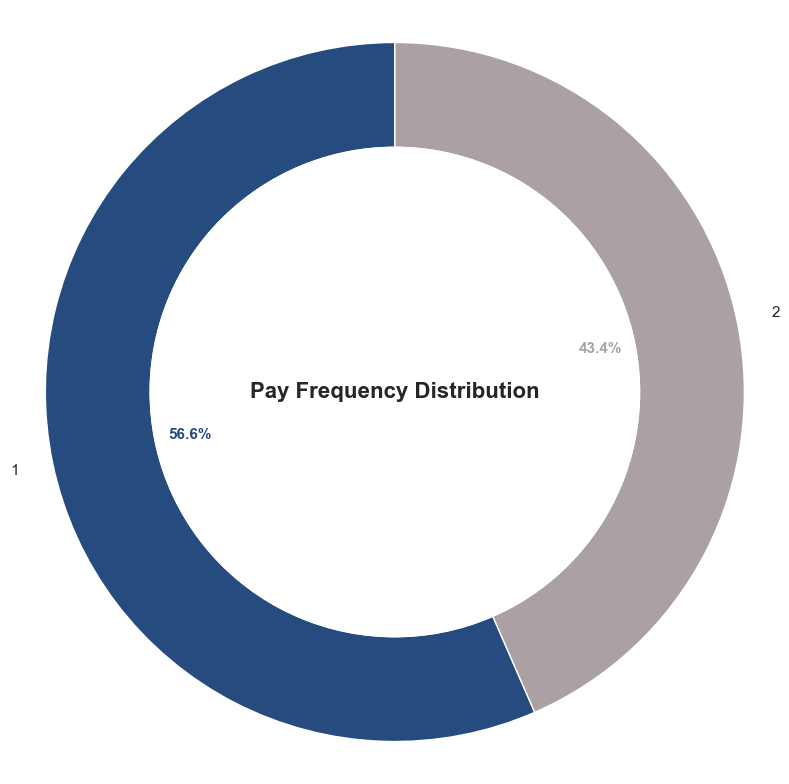

In [315]:
import panel as pn
import pandas as pd
import seaborn as sns
from datetime import datetime 
from matplotlib.ticker import FuncFormatter
import pyodbc

import matplotlib.pyplot as plt
import matplotlib.colors

# Ensure Panel extension is loaded
pn.extension()

# Define the connection string
conn = pyodbc.connect(
    'DRIVER={ODBC Driver 17 for SQL Server};'
    'SERVER=localhost\\SQLEXPRESS;'
    'DATABASE=AdventureWorks2022;'
    'Trusted_Connection=yes;'
)

# Write the SQL query to select data from the view
sql_query = "SELECT * FROM HumanResources.vEmployeeHRProject ORDER BY BusinessEntityID"

# Load the data from SQL Server into a pandas DataFrame
df = pd.read_sql(sql_query, conn)

# Close the connection
conn.close()

# Filter and clean data
filtered_df = df[df['EndDate'].isnull()]
cleaned_df = (filtered_df
              .sort_values('RateChangeDate', ascending=False)
              .groupby('BusinessEntityID')
              .first()
              .reset_index())

# Create a new column 'FullName' by concatenating 'FirstName' and 'LastName'
cleaned_df['FullName'] = cleaned_df['FirstName'] + ' ' + cleaned_df['LastName']

# Map 'F' to 'Female' and 'M' to 'Male'
cleaned_df['Gender'] = cleaned_df['Gender'].map({'F': 'Female', 'M': 'Male'})

# Map 'M' to 'Married' and 'S' to 'Single'
cleaned_df['MaritalStatus'] = cleaned_df['MaritalStatus'].map({'M': 'Married', 'S': 'Single'})

# Convert 'BirthDate' to datetime
cleaned_df['BirthDate'] = pd.to_datetime(cleaned_df['BirthDate'])

# Ensure 'Rate' is a string before removing the dollar sign and converting to numeric
cleaned_df['Rate'] = cleaned_df['Rate'].astype(str).str.replace('$', '').str.strip()
cleaned_df['Rate'] = pd.to_numeric(cleaned_df['Rate'], errors='coerce')

# Calculate Age
current_date = datetime.now()
cleaned_df['Age'] = (current_date - cleaned_df['BirthDate']).dt.days // 365

# Calculate Salary based on hourly rate (assuming 2080 working hours in a year)
cleaned_df['Salary'] = cleaned_df['Rate'] * 2080  # Annual salary

# Define the dropdown menu for departments
departments = ['All Departments'] + cleaned_df['DepartmentName'].unique().tolist()
department_selector = pn.widgets.Select(name='Department', options=departments, value='All Departments')

# Function to update the plots based on the selected department
@pn.depends(department_selector.param.value)
def update_plots(department):
    if department == 'All Departments':
        plot_df = cleaned_df
    else:
        plot_df = cleaned_df[cleaned_df['DepartmentName'] == department]
    
    # Gender & Marital Status Donut Charts
    gender_counts = plot_df['Gender'].value_counts()
    marital_counts = plot_df['MaritalStatus'].value_counts()

    fig, axes = plt.subplots(1, 2, figsize=(14, 6))

    def func(pct, allvalues):
        return f'{pct:.1f}%'

    wedges, texts, autotexts = axes[0].pie(gender_counts, 
                                            labels=gender_counts.index, 
                                            autopct=lambda pct: func(pct, gender_counts), 
                                            startangle=90, 
                                            colors=['#254b7f', '#ABA1A5'], 
                                            wedgeprops=dict(width=0.3))

    for i, a in enumerate(autotexts):
        a.set_fontsize(11)
        a.set_color(wedges[i].get_facecolor())
        a.set_fontweight('bold')

    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    axes[0].add_artist(centre_circle)
    axes[0].text(0, 0, 'Gender Distribution', 
                 horizontalalignment='center', 
                 verticalalignment='center', 
                 fontsize=16, 
                 fontweight='bold')
    axes[0].axis('equal')

    wedges, texts, autotexts = axes[1].pie(marital_counts, 
                                            labels=marital_counts.index, 
                                            autopct=lambda pct: func(pct, marital_counts), 
                                            startangle=45, 
                                            colors=['#254b7f', '#ABA1A5'], 
                                            wedgeprops=dict(width=0.3))

    for i, a in enumerate(autotexts):
        a.set_fontsize(11)
        a.set_color(wedges[i].get_facecolor())
        a.set_fontweight('bold')

    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    axes[1].add_artist(centre_circle)
    axes[1].text(0, 0, 'Marital Status Distribution', 
                 horizontalalignment='center', 
                 verticalalignment='center', 
                 fontsize=16, 
                 fontweight='bold')
    axes[1].axis('equal')

    plt.tight_layout()

    # Scatterplot of Age & Salary
    plot_df = plot_df.dropna(subset=['Salary', 'Age'])
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=plot_df, x='Age', y='Salary', color='#254b7f', s=200, alpha=0.6)
    plt.title('Scatter Plot of Salary vs Age', fontsize=16)
    plt.xlabel('Age (years)', fontsize=14)
    plt.ylabel('Salary (USD)', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda y, pos: f'${int(y/1000)}K' if y >= 1000 else f'${int(y)}'))
    sns.despine()
    plt.show()

    # Bar Graph Showing Employees by Shift
    plt.figure(figsize=(10, 6))
    ax = sns.countplot(data=plot_df, x='ShiftName', palette='crest_r', hue='ShiftName')
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='center', 
                    xytext=(0, -20), 
                    textcoords='offset points', 
                    fontsize=12, color='white', fontweight='bold')
    plt.title('Number of Employees by Shift', fontsize=16)
    plt.xlabel('')
    plt.ylabel('Number of Employees', fontsize=14)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    sns.despine()
    plt.show()

    # Bar Graph showing Departments and Number of Employees
    department_counts = plot_df['DepartmentName'].value_counts().reset_index()
    department_counts.columns = ['DepartmentName', 'Employee Count']
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Employee Count', y='DepartmentName', data=department_counts, palette='crest_r', hue='DepartmentName')
    for index, value in enumerate(department_counts['Employee Count']):
        plt.text(value, index, f' {value}', color='black', va='center', fontsize=12, fontweight='bold')
    plt.xlabel('')
    plt.ylabel('')
    plt.title('Number of Employees per Department', fontsize=16)
    sns.despine()
    plt.tight_layout()
    plt.show()

    # Visualization of the Organization Chart
    plot_df['OrganizationLevel'] = plot_df['OrganizationLevel'].fillna(0)
    org_level_counts = plot_df['OrganizationLevel'].value_counts().reset_index()
    org_level_counts.columns = ['OrganizationLevel', 'Employee Count']
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Employee Count', y='OrganizationLevel', data=org_level_counts, palette='crest_r', orient='h', hue='OrganizationLevel', legend=False)
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, pos: int(x)))
    plt.xlabel('Number of Employees')
    plt.ylabel('Organization Level')
    plt.title('Number of Employees per Organization Level', size=16)
    sns.despine()
    for index, value in enumerate(org_level_counts['Employee Count']):
        plt.text(value, len(org_level_counts) - 1 - index, str(value), va='center', fontsize=12, color='black')
    plt.show()

    # Chart showing Median Salary by Department
    median_salary_by_department = plot_df.groupby('DepartmentName')['Salary'].median().reset_index()
    median_salary_by_department = median_salary_by_department.sort_values(by='Salary', ascending=False)
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Salary', y='DepartmentName', data=median_salary_by_department, palette='crest_r', hue='DepartmentName')
    plt.xlabel('Median Salary (USD)', fontsize=14)
    plt.ylabel('')
    plt.title('Median Salary by Department', fontsize=16)
    plt.gca().xaxis.set_major_formatter(FuncFormatter(lambda x, pos: f'${int(x/1000)}K' if x >= 1000 else f'${int(x)}'))
    sns.despine()
    plt.tight_layout()
    plt.show()

    # Pie Chart for Pay Frequency
    pay_frequency_counts = plot_df['PayFrequency'].value_counts()
    fig, ax = plt.subplots(figsize=(8, 8))
    wedges, texts, autotexts = ax.pie(pay_frequency_counts, 
                                      labels=pay_frequency_counts.index, 
                                      autopct=lambda pct: func(pct, pay_frequency_counts), 
                                      startangle=90, 
                                      colors=['#254b7f', '#ABA1A5'], 
                                      wedgeprops=dict(width=0.3))
    for i, a in enumerate(autotexts):
        a.set_fontsize(11)
        a.set_color(wedges[i].get_facecolor())
        a.set_fontweight('bold')
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax.add_artist(centre_circle)
    ax.text(0, 0, 'Pay Frequency Distribution', 
            horizontalalignment='center', 
            verticalalignment='center', 
            fontsize=16, 
            fontweight='bold')
    ax.axis('equal')
    plt.tight_layout()
    plt.show()

    return pn.pane.Matplotlib(fig)

# Create the dashboard layout
dashboard = pn.Column(
    pn.Row(department_selector),
    update_plots
)

# Serve the dashboard
dashboard.servable()